<a href="https://colab.research.google.com/github/Samuel-Mason-git/Recent-Projects/blob/main/Computer%20Vision%20Binary%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification - Dog and Cats
Using a range of Models in order to accurately predict and classify if an image is a photo of a Dog or a Cat.


**Preprocessing**

  *   Understanding Data
  *   Visualising Data
  *   Checking for currupt Images
  *   Train, Test and Validation Datagens



**Models**


---

*   Model 0 - Very Basic 2D CNN
  *   Training - - accuracy: 1.0000 - auc_8: 1.0000 - loss: 0.0062 - val_accuracy: 0.6921 - val_auc_8: 0.7536 - val_loss: 1.5590
  *   Evaluation - -  Test Loss: 1.8325 - Test Accuracy: 0.6772 - Test AUC: 0.5312

---
*   Model 1 - Basic 2D CNN - Conv2D x 3, MaxPooling2D x 3
  *   Training - accuracy: 0.6324 - auc: 0.6914 - loss: 0.6317 - val_accuracy: 0.6146 - val_auc: 0.7205 - val_loss: 0.6638
  *   Evaluation - - Test Loss: 0.6644 - Test Accuracy: 0.6139 - Test AUC: 0.7395
---
*   Model 2 - Xception Network (Smaller Version)
  *   Training -- acc: 0.9096 - auc: 0.9290 - loss: 0.2288 - val_acc: 0.8395 - val_auc: 0.8687 - val_loss: 0.3008
  *   Evaluation - - Test Loss: 0.2193 - Test Accuracy: 0.9006 - Test AUC: 0.9329

---
*   Model 3 - Transfer Learning - MobileNetV2 with Fine Tuning
  *   Training -- accuracy: 0.7898 - auc: 0.8766 - loss: 0.4379 - val_accuracy: 0.7933 - val_auc: 0.8844 - val_loss: 0.4292
  *   Evaluation - Test Loss: 0.44165 - Test Accuracy: 0.79881 - Test AUC: 0.87834


---






**Evaluation**

The binary classification task aimed to distinguish between images of dogs and cats using various models. Each model demonstrated different levels of success, highlighting the impact of complexity and transfer learning on performance.

Initial models, including basic CNN architectures, struggled with accuracy and AUC scores, revealing limitations in their capacity to generalise. However, the Xception network and MobileNetV2 with fine-tuning achieved significantly better results, with MobileNetV2 reaching a Test Accuracy of 79.88% and Test AUC of 87.83%, demonstrating the value of transfer learning and advanced architectures for this problem.

In [38]:
!kaggle datasets download -d tongpython/cat-and-dog
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
import sklearn
import pandas as pd
from os import listdir
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall()
    zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


## Understanding our data
In the dataset we have:


*   2 Classes (Dog, Cat)
*   4000 Training images of each Class
*   1000 Testing images of each Class





In [39]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/test_set"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

for dirpath, dirnames, filenames in os.walk("/content/training_set"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

data_dir = pathlib.Path('/content/training_set/training_set')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories

print(f"\nThere are a total of {len(class_names)} classes: {class_names}")
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

There are 1 directories and 0 images in '/content/test_set'.
There are 2 directories and 0 images in '/content/test_set/test_set'.
There are 0 directories and 1012 images in '/content/test_set/test_set/cats'.
There are 0 directories and 1013 images in '/content/test_set/test_set/dogs'.
There are 1 directories and 0 images in '/content/training_set'.
There are 2 directories and 0 images in '/content/training_set/training_set'.
There are 0 directories and 4001 images in '/content/training_set/training_set/cats'.
There are 0 directories and 4006 images in '/content/training_set/training_set/dogs'.

There are a total of 2 classes: ['cats' 'dogs']


## Checking for Currupted Images


*   No currupt Images were found




In [40]:
def check_image(path):
    count = 0
    re_count = 0
    for filename in os.listdir(path):
      if filename.endswith('.jpg'):
        file_path = os.path.join(path, filename)
        try:
            img = Image.open(file_path)
            img.verify()
            count += 1
        except (IOError, SyntaxError) as e:
            os.remove(file_path)
            re_count += 1
    print(f"Current Path: {path}")
    print(f"Number of images removed: {re_count}")

paths = ['/content/test_set/test_set/cats', '/content/test_set/test_set/dogs', '/content/training_set/training_set/cats', '/content/training_set/training_set/dogs']
for path in paths:
  check_image(path)

Current Path: /content/test_set/test_set/cats
Number of images removed: 0
Current Path: /content/test_set/test_set/dogs
Number of images removed: 0
Current Path: /content/training_set/training_set/cats
Number of images removed: 0
Current Path: /content/training_set/training_set/dogs
Number of images removed: 0


# Preprocessing










## Flow from Directory


In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_set/training_set',
    labels='inferred',
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=82,
    validation_split=0.2,
    subset="training",
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_set/training_set',
    labels='inferred',
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=82,
    validation_split=0.2,
    subset="validation",
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test_set/test_set',
    labels='inferred',
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=82,
)

print(train_ds.class_names)


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.
['cats', 'dogs']


## Visualising Images and Labels

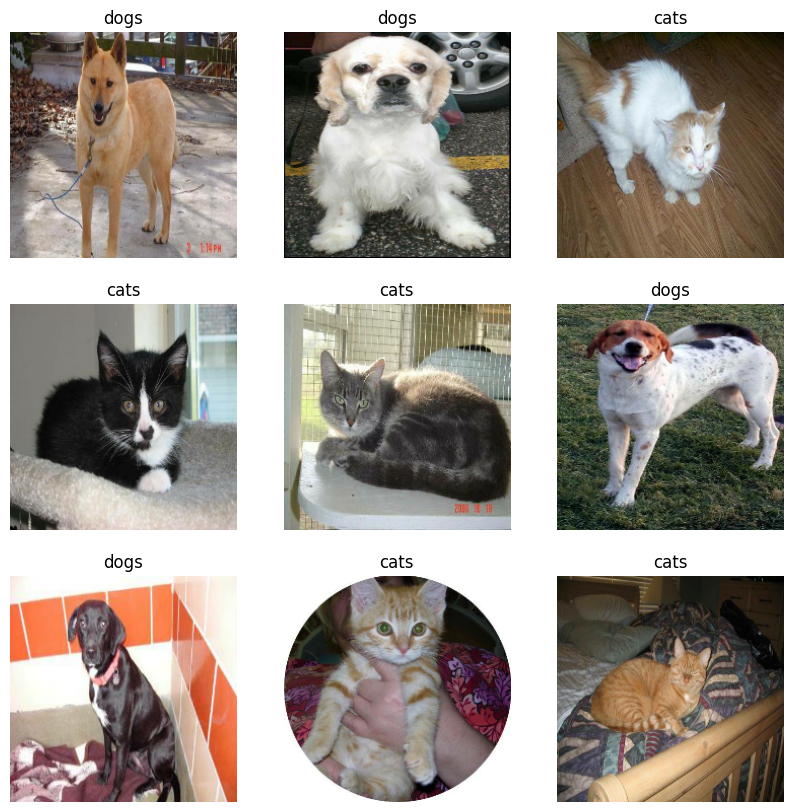

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

# Fitting and Testing Models

In [12]:
model_metrics = {}

def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.show()


## Model 0 - Very Basic CNN Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

inputs = keras.Input(shape=[224, 224, 3])

x = layers.Conv2D(128, 3)(inputs)
x = keras.activations.relu(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64, 3)(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])


# Train the model
model_history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    verbose=1
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 222, 222, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         186,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,001 (1.01 MB)

 Trainable params: 264,001 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 0.5177 - auc: 0.5213 - loss: 164.5661 - val_accuracy: 0.6402 - val_auc: 0.6782 - val_loss: 1.9995
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.6977 - auc: 0.7581 - loss: 1.5412 - val_accuracy: 0.6690 - val_auc: 0.7195 - val_loss: 1.5266
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.8007 - auc: 0.8779 - loss: 0.7216 - val_accuracy: 0.6596 - val_auc: 0.7236 - val_loss: 1.6968
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.8371 - auc: 0.9179 - loss: 0.5453 - val_accuracy: 0.6790 - val_auc: 0.7435 - val_loss: 1.6551
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8861 - auc: 0.9553 - loss: 0.3462 - val_accuracy: 0.6677 - val_auc: 0.7299 - val_loss: 1.5361
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9190 - auc: 0.9737 - loss: 0.2458 - val_accuracy: 0.6896 - val_auc: 0.7510 - val_loss: 1.4594
Epoch 7/10
101/101 ━

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.6610 - auc: 0.7169 - loss: 2.0174
Test Loss: 2.019625186920166
Test Accuracy: 0.6707859635353088
Test AUC: 0.719643235206604


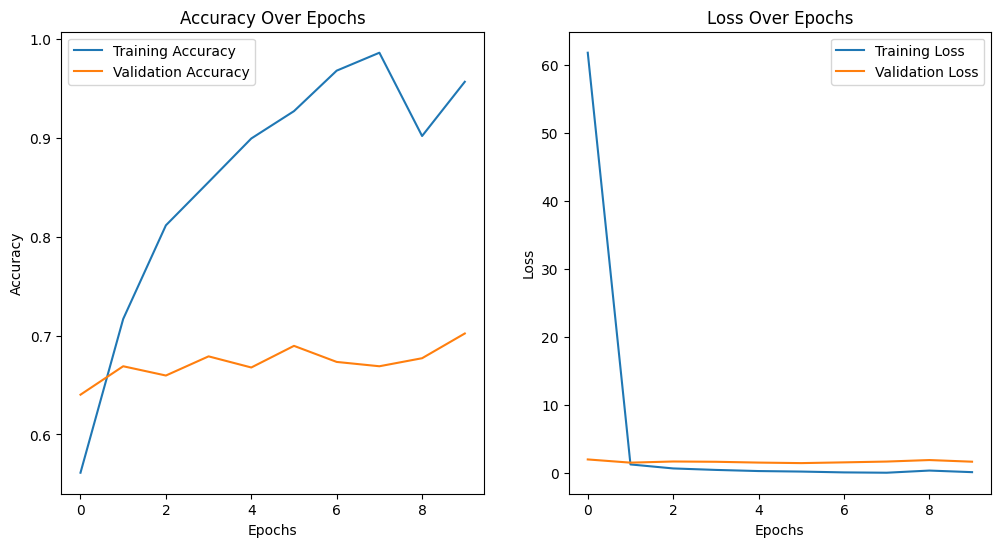

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


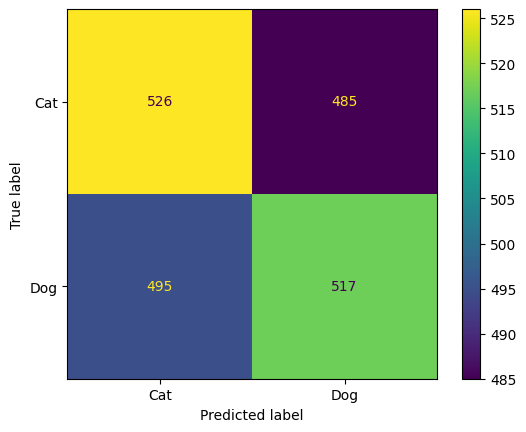

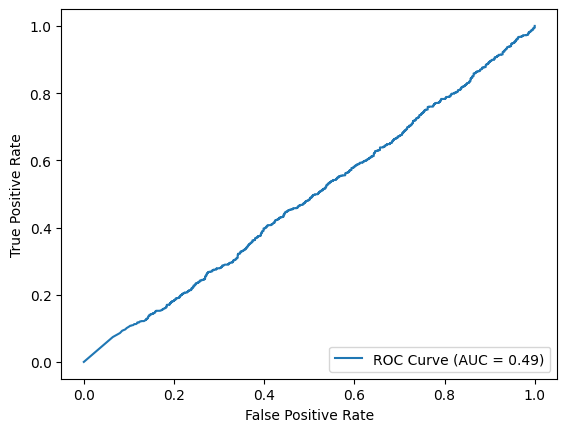

model:
  Test Loss: 2.0196
  Test Accuracy: 0.6708
  AUC: 0.4871
  Confusion Matrix:
    [[526, 485],
     [495, 517]]
  Classification Report:
              precision    recall  f1-score   support

         Cat       0.52      0.52      0.52      1011
         Dog       0.52      0.51      0.51      1012

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023





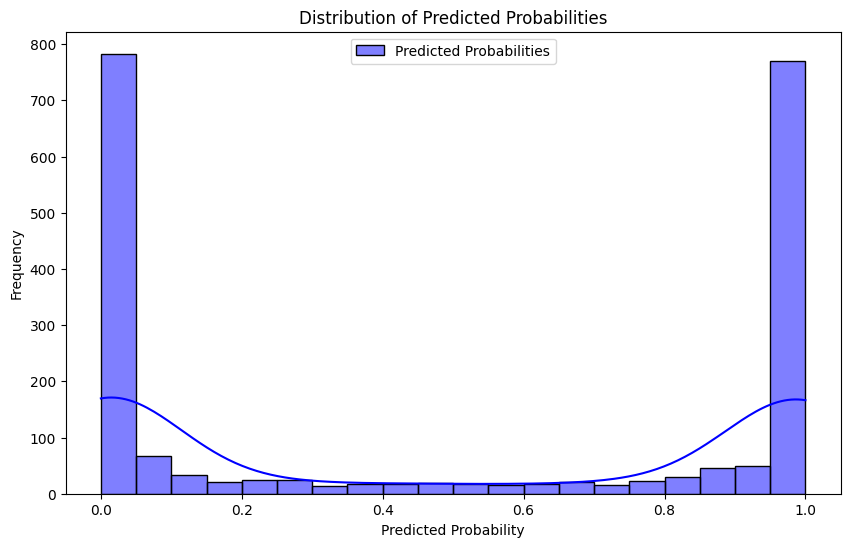

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy, test_auc = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

# Plot training history (assuming plot_history is defined)
plot_history(model_history)

# Predict on the test dataset
predictions = model.predict(test_ds)
predicted_labels = (predictions > 0.5).astype(int)  # Binarize predictions

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convert the labels to a list
true_labels = np.array(true_labels)  # Convert the list to a numpy array

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

# Calculate AUC
y_prob = model.predict(test_ds).flatten()  # Flatten predictions to use for AUC calculation
auc = roc_auc_score(true_labels, y_prob)

# Generate classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog'])

# Store model metrics
model_metrics = {
    'model': {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm.tolist(),
        'AUC': auc,
        'classification_report': classification_rep
    }
}

# Plot confusion matrix
cm_display.plot()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(true_labels, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Print model metrics
for model_name, metrics in model_metrics.items():
    print(f"{model_name}:")
    print(f"  Test Loss: {metrics['test_loss']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print("  Confusion Matrix:")
    print(f"    [[{metrics['confusion_matrix'][0][0]}, {metrics['confusion_matrix'][0][1]}],")
    print(f"     [{metrics['confusion_matrix'][1][0]}, {metrics['confusion_matrix'][1][1]}]]")
    print(f"  Classification Report:\n{metrics['classification_report']}")
    print("\n")


import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, kde=True, bins=20, color='blue', label='Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Model 1 - Basic 2D CNN - Conv2D x 5, MaxPooling2D x 5


In [ ]:

baseline_model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
  layers.Dropout(0.5),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
])
baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
baseline_model_history = baseline_model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds,
        verbose=1,
        callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 30s 204ms/step - accuracy: 0.5082 - auc: 0.5094 - loss: 27.1058 - val_accuracy: 0.5240 - val_auc: 0.5178 - val_loss: 0.6928
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.5160 - auc: 0.5208 - loss: 0.6931 - val_accuracy: 0.5097 - val_auc: 0.5364 - val_loss: 0.6925
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.5319 - auc: 0.5441 - loss: 0.6906 - val_accuracy: 0.5540 - val_auc: 0.6186 - val_loss: 0.6779
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.5367 - auc: 0.5450 - loss: 0.6937 - val_accuracy: 0.5203 - val_auc: 0.5659 - val_loss: 0.6913
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.5442 - auc: 0.5784 - loss: 0.6815 - val_accuracy: 0.5059 - val_auc: 0.5206 - val_loss: 0.6928
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.5495 - auc: 0.5645 - loss: 0.6849 - val_accuracy: 0.4984 - val_auc: 0.5403 - val_loss: 0.6930


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.5630 - auc: 0.6285 - loss: 0.6762
Test Loss: 0.6758044958114624
Test Accuracy: 0.566979706287384
Test AUC: 0.6271507143974304


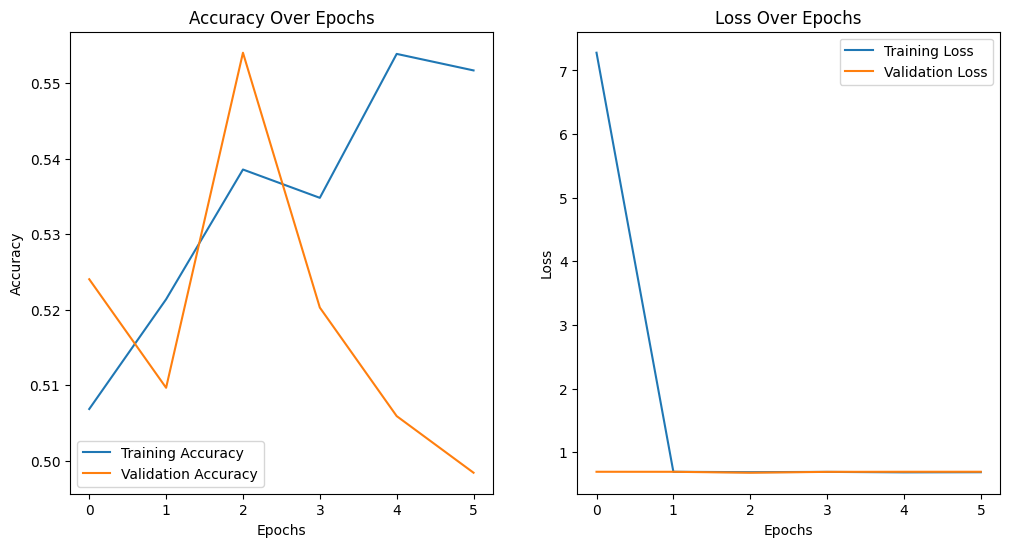

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


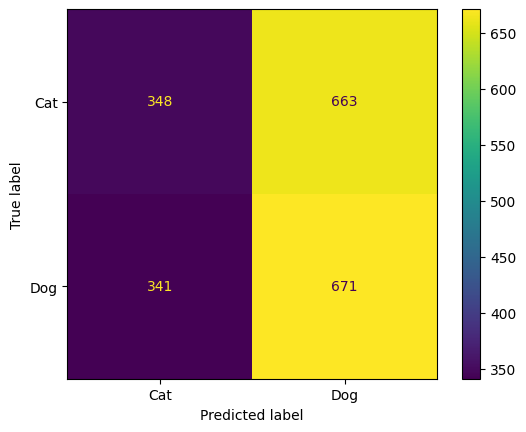

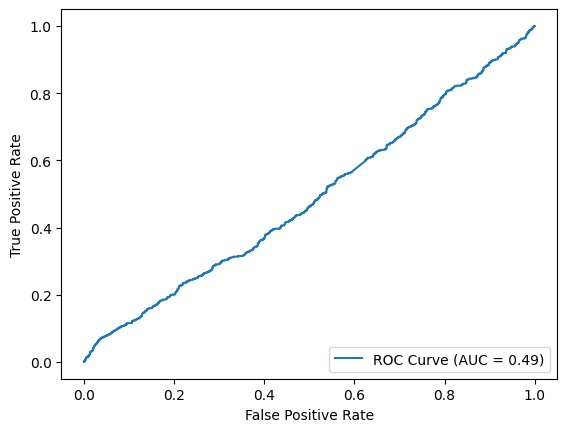

model:
  Test Loss: 0.6758
  Test Accuracy: 0.5670
  AUC: 0.4875
  Confusion Matrix:
    [[348, 663],
     [341, 671]]
  Classification Report:
              precision    recall  f1-score   support

         Cat       0.51      0.34      0.41      1011
         Dog       0.50      0.66      0.57      1012

    accuracy                           0.50      2023
   macro avg       0.50      0.50      0.49      2023
weighted avg       0.50      0.50      0.49      2023





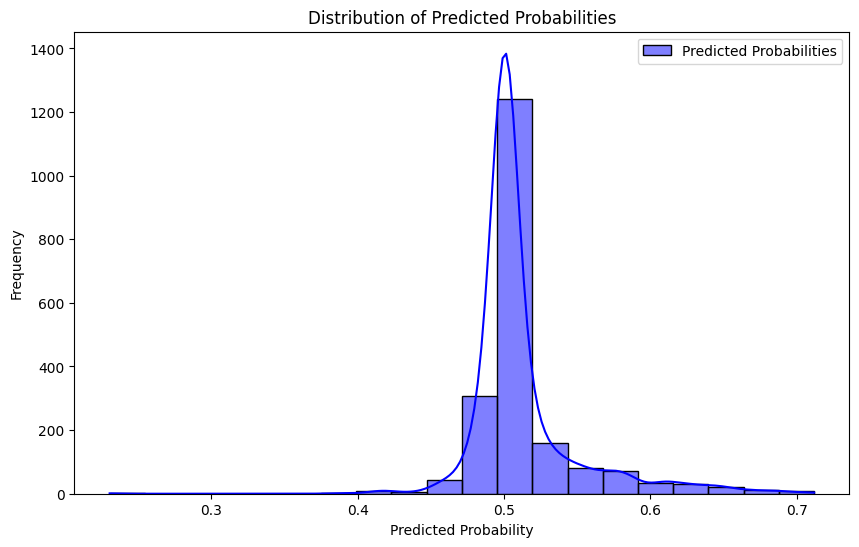

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy, test_auc = baseline_model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

# Plot training history (assuming plot_history is defined)
plot_history(baseline_model_history)

# Predict on the test dataset
predictions = baseline_model.predict(test_ds)
predicted_labels = (predictions > 0.5).astype(int)  # Binarize predictions

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convert the labels to a list
true_labels = np.array(true_labels)  # Convert the list to a numpy array

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

# Calculate AUC
y_prob = baseline_model.predict(test_ds).flatten()  # Flatten predictions to use for AUC calculation
auc = roc_auc_score(true_labels, y_prob)

# Generate classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog'])

# Store model metrics
model_metrics = {
    'model': {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm.tolist(),
        'AUC': auc,
        'classification_report': classification_rep
    }
}

# Plot confusion matrix
cm_display.plot()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(true_labels, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Print model metrics
for model_name, metrics in model_metrics.items():
    print(f"{model_name}:")
    print(f"  Test Loss: {metrics['test_loss']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print("  Confusion Matrix:")
    print(f"    [[{metrics['confusion_matrix'][0][0]}, {metrics['confusion_matrix'][0][1]}],")
    print(f"     [{metrics['confusion_matrix'][1][0]}, {metrics['confusion_matrix'][1][1]}]]")
    print(f"  Classification Report:\n{metrics['classification_report']}")
    print("\n")


import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, kde=True, bins=20, color='blue', label='Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Model 2 - Data Augmentation and Small version of Xception Network



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

# Load the datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_set/training_set',
    labels='inferred',
    batch_size=128,
    image_size=(180, 180),
    shuffle=True,
    seed=82,
    validation_split=0.2,
    subset="training",
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_set/training_set',
    labels='inferred',
    batch_size=128,
    image_size=(180, 180),
    shuffle=True,
    seed=82,
    validation_split=0.2,
    subset="validation",
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test_set/test_set',
    labels='inferred',
    batch_size=128,
    image_size=(180, 180),
    shuffle=True,
    seed=82,
)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.1),
])




Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


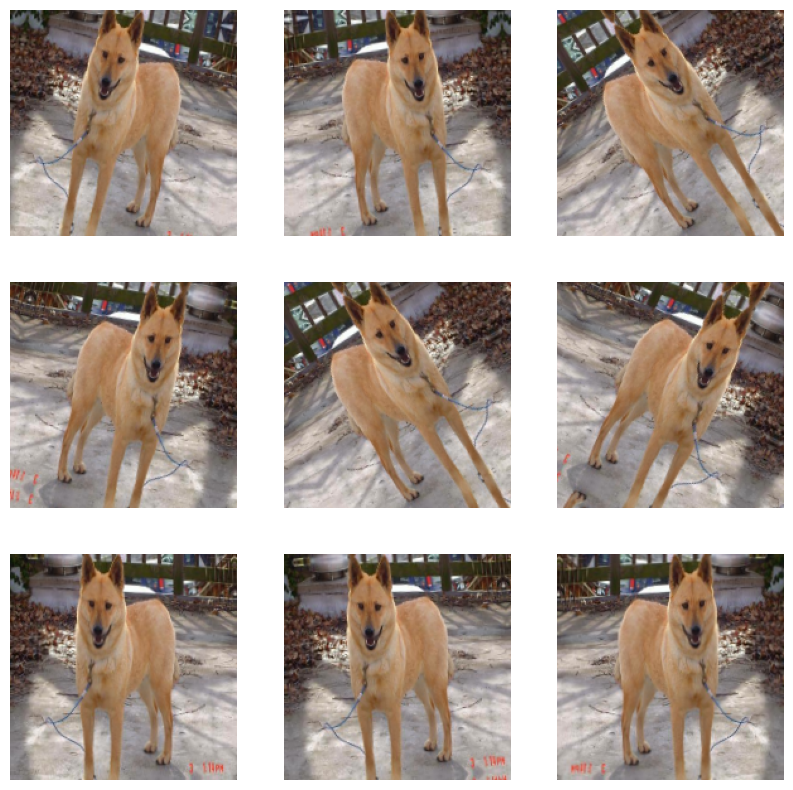

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")


from tensorflow import data as tf_data

# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

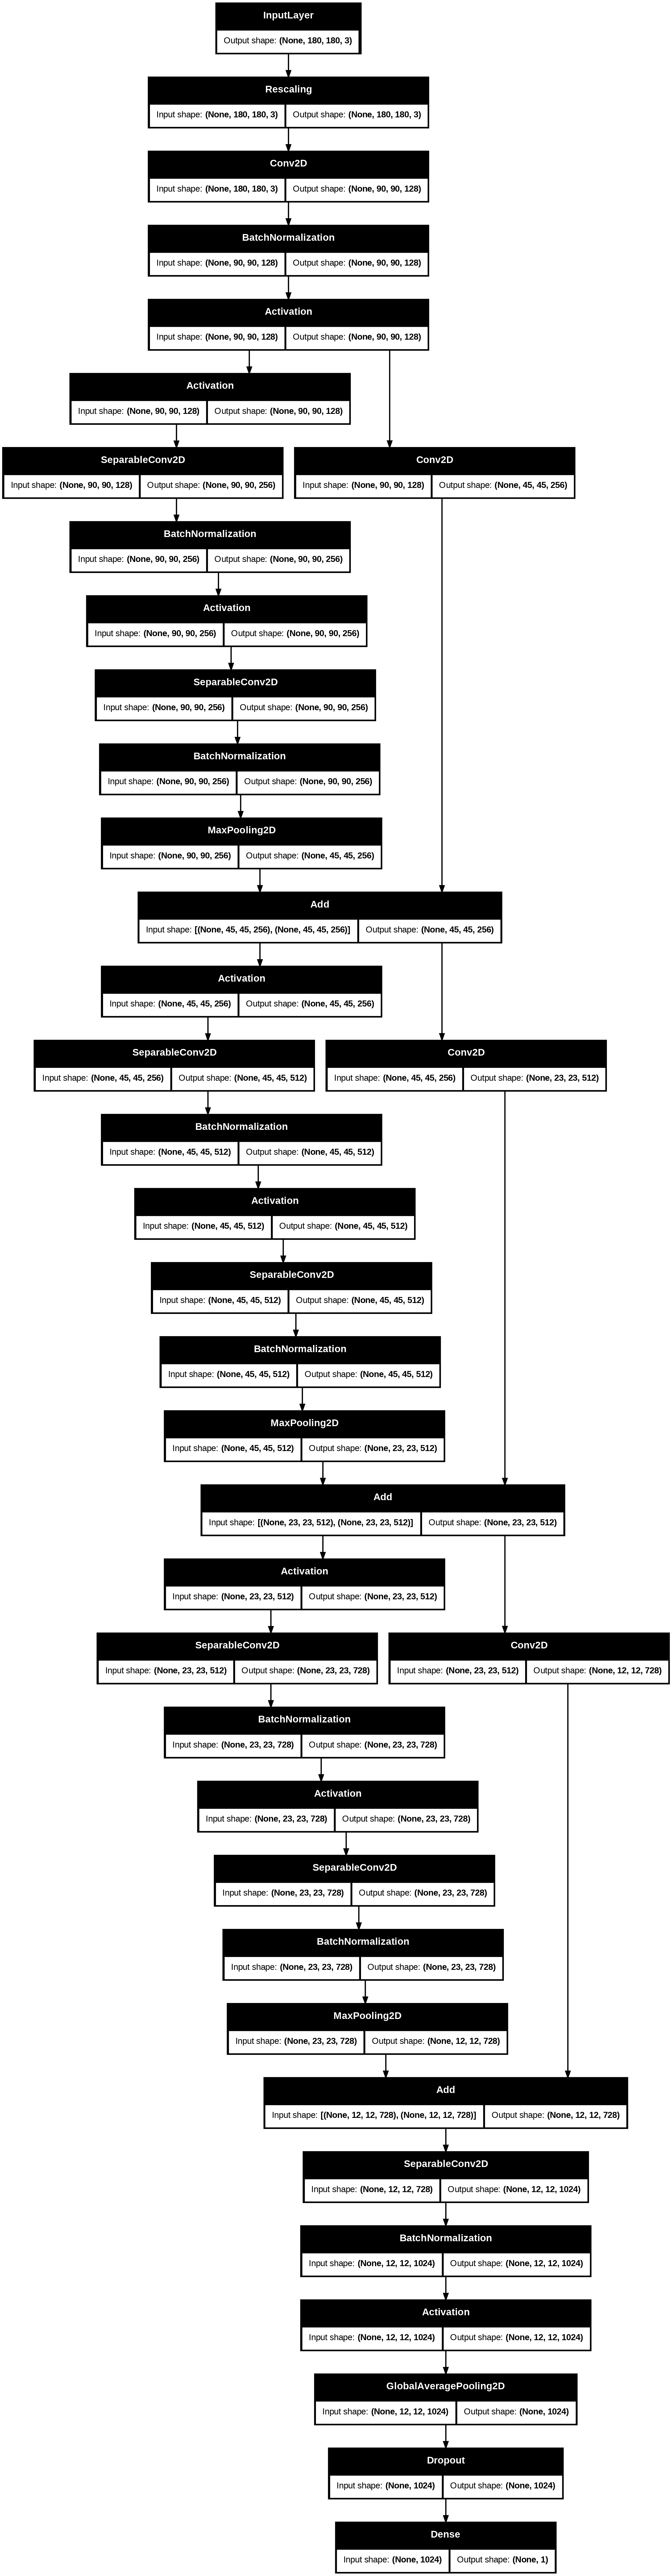

In [ ]:
image_size = (180, 180)
batch_size = 128

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), tf.keras.metrics.AUC(name='auc')],
)
model_history = model.fit(
    train_ds,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5981 - auc: 0.6452 - loss: 0.6693 - val_accuracy: 0.5209 - val_auc: 0.5000 - val_loss: 0.6923
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6705 - auc: 0.7224 - loss: 0.5976 - val_accuracy: 0.5209 - val_auc: 0.5000 - val_loss: 0.6932
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6999 - auc: 0.7429 - loss: 0.5707 - val_accuracy: 0.5209 - val_auc: 0.5000 - val_loss: 0.6942
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7384 - auc: 0.7803 - loss: 0.5177 - val_accuracy: 0.5209 - val_auc: 0.5000 - val_loss: 0.6934
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7715 - auc: 0.8187 - loss: 0.4697 - val_accuracy: 0.5209 - val_auc: 0.5000 - val_loss: 0.6917
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7786 - auc: 0.8169 - loss: 0.4618 - val_accuracy: 0.5209 - val_auc: 0.5000 - val_loss: 0.6913
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step -

16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8970 - auc: 0.9277 - loss: 0.2264
Test Loss: 0.21933922171592712
Test Accuracy: 0.9006426334381104
Test AUC: 0.9329231977462769


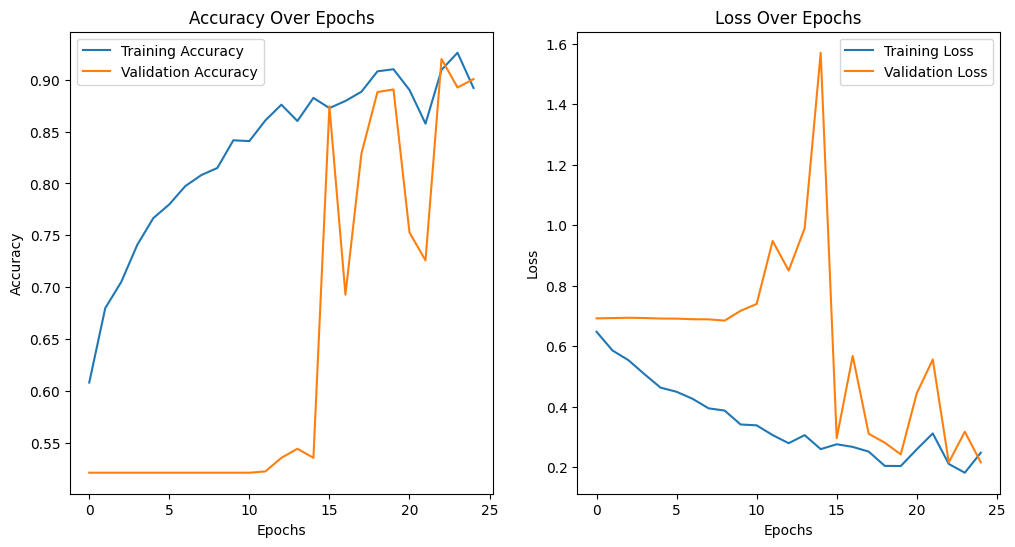

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step


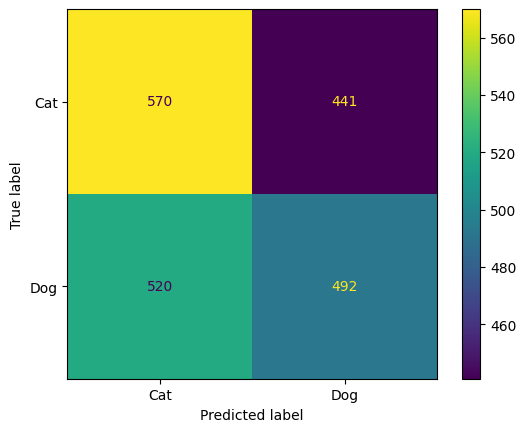

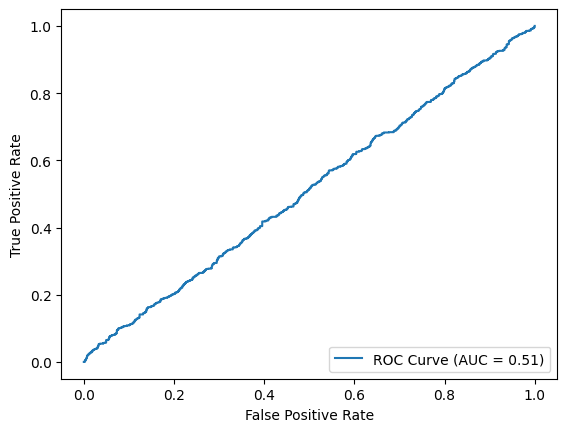

model:
  Test Loss: 0.2193
  Test Accuracy: 0.9006
  AUC: 0.5098
  Confusion Matrix:
    [[570, 441],
     [520, 492]]
  Classification Report:
              precision    recall  f1-score   support

         Cat       0.52      0.56      0.54      1011
         Dog       0.53      0.49      0.51      1012

    accuracy                           0.52      2023
   macro avg       0.53      0.52      0.52      2023
weighted avg       0.53      0.52      0.52      2023





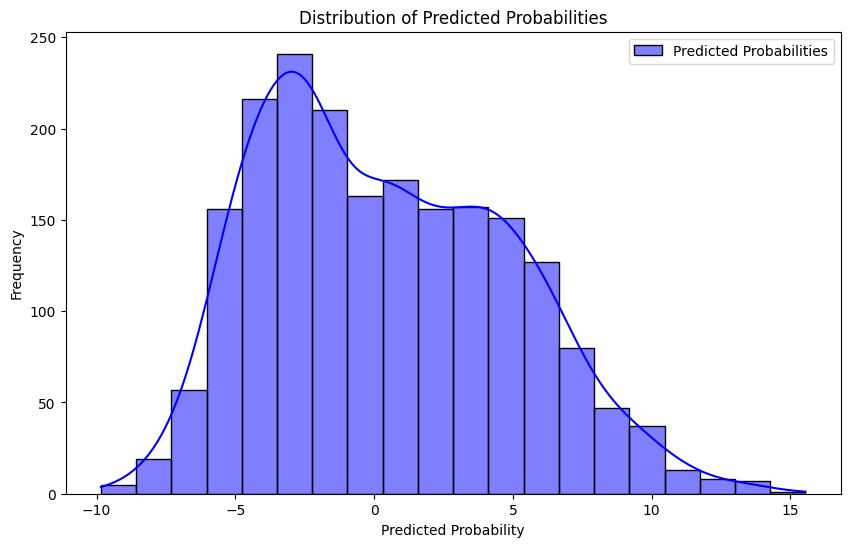

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy, test_auc = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

# Plot training history (assuming plot_history is defined)
plot_history(model_history)

# Predict on the test dataset
predictions = model.predict(test_ds)
predicted_labels = (predictions > 0.5).astype(int)  # Binarize predictions

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convert the labels to a list
true_labels = np.array(true_labels)  # Convert the list to a numpy array

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

# Calculate AUC
y_prob = model.predict(test_ds).flatten()  # Flatten predictions to use for AUC calculation
auc = roc_auc_score(true_labels, y_prob)

# Generate classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog'])

# Store model metrics
model_metrics = {
    'model': {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm.tolist(),
        'AUC': auc,
        'classification_report': classification_rep
    }
}

# Plot confusion matrix
cm_display.plot()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(true_labels, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Print model metrics
for model_name, metrics in model_metrics.items():
    print(f"{model_name}:")
    print(f"  Test Loss: {metrics['test_loss']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print("  Confusion Matrix:")
    print(f"    [[{metrics['confusion_matrix'][0][0]}, {metrics['confusion_matrix'][0][1]}],")
    print(f"     [{metrics['confusion_matrix'][1][0]}, {metrics['confusion_matrix'][1][1]}]]")
    print(f"  Classification Report:\n{metrics['classification_report']}")
    print("\n")


import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, kde=True, bins=20, color='blue', label='Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Model 3 - MobileNetV2 Transfer Learning with Fine Tuning

In [43]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
LR = 1e-4

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.2)
])

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer=Adam(learning_rate=LR),
              loss='binary_crossentropy',
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name="accuracy"),
                  tf.keras.metrics.AUC(name='auc')
              ])


history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds
)


# Fine-Tune: Unfreeze the last few layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last N layers
N = 30
for layer in base_model.layers[-N:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=LR / 10),
              loss='binary_crossentropy',
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name="accuracy"),
                  tf.keras.metrics.AUC(name='auc')
              ])


history_fine = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.4944 - auc: 0.5006 - loss: 0.8470 - val_accuracy: 0.5359 - val_auc: 0.5429 - val_loss: 0.6957
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.5136 - auc: 0.5241 - loss: 0.8185 - val_accuracy: 0.5640 - val_auc: 0.5975 - val_loss: 0.6779
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.5360 - auc: 0.5509 - loss: 0.7804 - val_accuracy: 0.5865 - val_auc: 0.6309 - val_loss: 0.6666
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.5523 - auc: 0.5653 - loss: 0.7641 - val_accuracy: 0.6059 - val_auc: 0.6537 - val_loss: 0.6580
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.5526 - auc: 0.5716 - loss: 0.7538 - val_accuracy: 0.6077 - val_auc: 0.6691 - val_loss: 0.6528
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.5505 - auc: 0.5805 - loss: 0.7388 - val_accuracy: 0.6202 - val_auc: 0.6813 - val_loss: 0.6485
Epoch 7/10
101/101 ━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8061 - auc: 0.8851 - loss: 0.4310
Test Loss: 0.44165611267089844
Test Accuracy: 0.7988136410713196
Test AUC: 0.8783451318740845


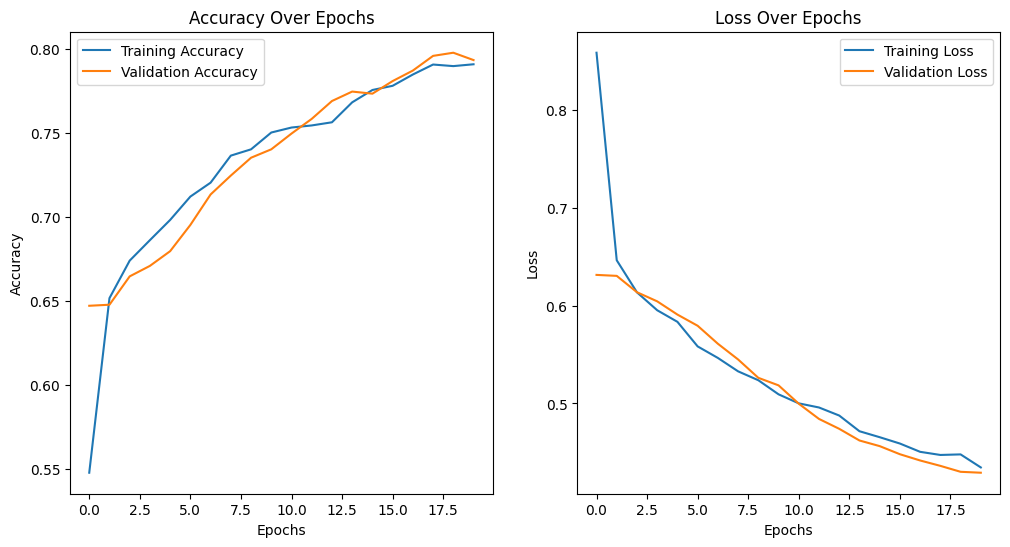

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step


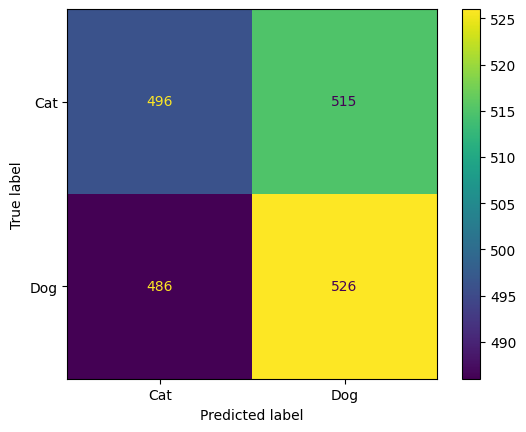

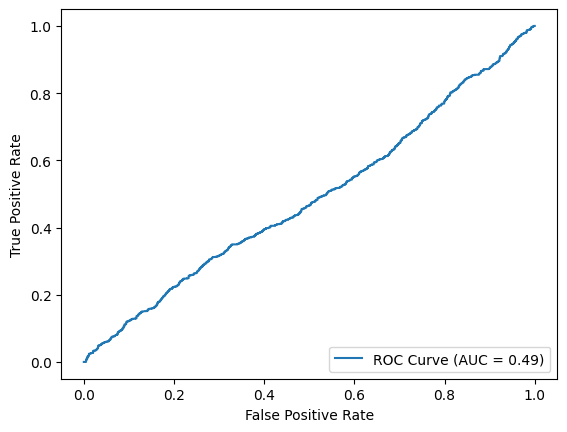

model:
  Test Loss: 0.4417
  Test Accuracy: 0.7988
  AUC: 0.4878
  Confusion Matrix:
    [[496, 515],
     [486, 526]]
  Classification Report:
              precision    recall  f1-score   support

         Cat       0.51      0.49      0.50      1011
         Dog       0.51      0.52      0.51      1012

    accuracy                           0.51      2023
   macro avg       0.51      0.51      0.51      2023
weighted avg       0.51      0.51      0.51      2023





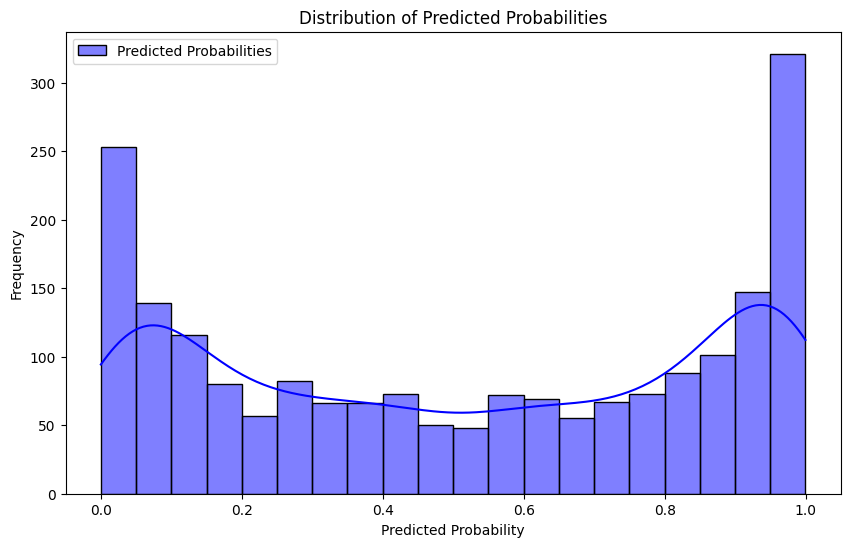

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy, test_auc = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

# Plot training history (assuming plot_history is defined)
plot_history(history_fine)

# Predict on the test dataset
predictions = model.predict(test_ds)
predicted_labels = (predictions > 0.5).astype(int)  # Binarize predictions

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Convert the labels to a list
true_labels = np.array(true_labels)  # Convert the list to a numpy array

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

# Calculate AUC
y_prob = model.predict(test_ds).flatten()  # Flatten predictions to use for AUC calculation
auc = roc_auc_score(true_labels, y_prob)

# Generate classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog'])

# Store model metrics
model_metrics = {
    'model': {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm.tolist(),
        'AUC': auc,
        'classification_report': classification_rep
    }
}

# Plot confusion matrix
cm_display.plot()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(true_labels, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Print model metrics
for model_name, metrics in model_metrics.items():
    print(f"{model_name}:")
    print(f"  Test Loss: {metrics['test_loss']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print("  Confusion Matrix:")
    print(f"    [[{metrics['confusion_matrix'][0][0]}, {metrics['confusion_matrix'][0][1]}],")
    print(f"     [{metrics['confusion_matrix'][1][0]}, {metrics['confusion_matrix'][1][1]}]]")
    print(f"  Classification Report:\n{metrics['classification_report']}")
    print("\n")


import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, kde=True, bins=20, color='blue', label='Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()